In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import codecs

In [2]:
test_csv_path = '../Data/dataTemp/output_review_yelpHotelData_NRYRcleaned.csv'
df_yelpchi1 = pd.read_csv(test_csv_path, sep='delimiter', header=None)

In [3]:
print(df_yelpchi1.tail(10))

                                                      0
5844  My friend and I, along with our mothers, staye...
5845  staff was rude, revolving door was really hard...
5846  So Surprising when we arrived, The staff was g...
5847  ost things about this hotel were nice. However...
5848  I agree with all the complimentary things othe...
5849  This hotel is amazing! Granted, I worked here,...
5850  "Short Version: I am very torn about this plac...
5851  Sutton Place is a very elegant hotel. The room...
5852  "The only great thing is location. Rest of the...
5853  Noise, noise, noise! Unbelievable! Between the...


In [4]:
sample = df_yelpchi1[0]

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
swords = set(stopwords.words("english"))
stemmer = PorterStemmer()

def parse_text(review):
    clean_review = []
    # text = re.sub("[^a-zA-Z]", ' ', text)
    # text = text.lower().split()
    # text = [w for w in text if w not in swords]
    
    # # Stemming
    # stems = [stemmer.stem(ss) for ss in text]
    for text in review:
        text = re.sub("[^a-zA-Z]", ' ', text)
        text = text.lower().split()
        text = [w for w in text if w not in swords]
        
        # Stemming
        # stems = [stemmer.stem(ss) for ss in text]
        text = " ".join(text)
        clean_review.append(text)
    
    return clean_review

sample = parse_text(sample)

In [8]:
df_clean = pd.DataFrame(sample,columns = ['text'])
print(df_clean['text'].tail(20))

5834    westins definitely nice one issue front desk s...
5835    stayed last sunday april friends visiting chic...
5836    fantastic place staff consistant definately ba...
5837                  great place stay many business near
5838    post scriptum earlier less positive review day...
5839    boyfriend stayed hotel pretty cheap night grea...
5840    choose hotel via hotwire happier mark front de...
5841    booked hotel last minute trip chicago moment w...
5842    place awesome well except weird order channels...
5843    husband enjoyed stay february great value rece...
5844    friend along mothers stayed laquinta november ...
5845    staff rude revolving door really hard push per...
5846    surprising arrived staff great rooms cleaned s...
5847    ost things hotel nice however light sleeper al...
5848    agree complimentary things others said special...
5849    hotel amazing granted worked might biased ever...
5850    short version torn place great things things t...
5851    sutton

In [9]:
### MENGINPUT METADATA

df_meta = pd.read_csv("../output_meta_yelpHotelData_NRYRcleaned.csv", sep=';')
print(df_meta.shape)

df_meta['label'] = df_meta['label'].replace({'N': 0, 'Y': 1})
df_meta


(5854, 9)


,date,review_id,reviewer_id,product_id,label,useful_count,funny_count,cool_count,rate
0,06/08/2011,MyNjnxzZVTPq,IFTr6_6NI4CgCVavIL9k5g,tQfLGoolUMu2J0igcWcoZg,0,28,11,18,5
1,8/30/2011,BdD7fsPqHQL73hwENEDT-Q,c_-hF15XgNhlyy_TqzmdaA,tQfLGoolUMu2J0igcWcoZg,0,4,3,0,3
2,6/26/2009,BfhqiyfC,CiwZ6S5ZizAFL5gypf8tLA,tQfLGoolUMu2J0igcWcoZg,0,23,14,12,5
3,9/16/2010,Ol,nf3q2h-kSQoZK2jBY92FOg,tQfLGoolUMu2J0igcWcoZg,0,6,2,8,1
4,02/05/2010,i4HIAcNTjabdpG1K4F5Q2g,Sb3DJGdZ4Rq__CqxPbae-g,tQfLGoolUMu2J0igcWcoZg,0,9,4,11,3
...,...,...,...,...,...,...,...,...,...
5849,10/15/2008,4d3lJEG5RgDDS_PimakHDw,eIOn-m017t7nu3FGpasPTg,gCdjyQeE0uRKCh7mVmnZzQ,1,0,0,0,5
5850,8/22/2011,M9sPYJENivJyWYuLwy7SCw,oVzvotuHA5u5Ob0E7i58Cw,rpP9iZsT3NC-Z4pUtQGoiA,1,0,0,0,3
5851,05/02/2011,IErE0ydkkLfAoePgqrVdUQ,wKPzlSO-Vyrzk8JlXr0cyQ,rpP9iZsT3NC-Z4pUtQGoiA,1,0,0,0,4
5852,12/19/2010,NnkA6YT9xo_IaZ5xZI_5zQ,SL4aEwrM2q0HAXHpduMQ1Q,rpP9iZsT3NC-Z4pUtQGoiA,1,0,0,0,1


In [10]:
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout, LSTM, Flatten, Input, concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, BatchNormalization

from sklearn.model_selection import train_test_split


0    5076
1     778
Name: label, dtype: int64

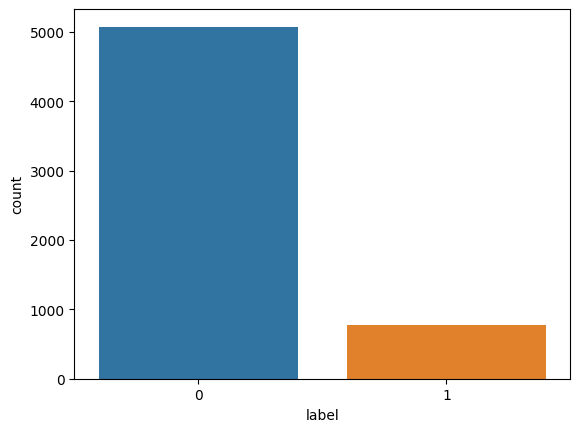

In [11]:
#variable of genuine (o) or fake (1)
sns.countplot(x='label', data=df_meta)
df_meta['label'].value_counts()
# df_label_merged.tail(10)

In [12]:
### PRE-PROCESS TAHAP 3-TOKENISASI
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras. preprocessing.sequence import pad_sequences
review_text_ori = df_clean['text'].to_list()
tokenizer_dict = {}
tokenizer_dict['ori'] = Tokenizer()
tokenizer_dict['ori'].fit_on_texts(review_text_ori)

In [13]:
encode_text_ori = tokenizer_dict['ori'].texts_to_sequences(review_text_ori)

In [14]:
genuine_fake_ori = to_categorical(df_meta['label'])
# genuine_fake2 = df_meta2['label']
# genuine_fake = pd.concat([genuine_fake1,genuine_fake2],axis= 0)
print(genuine_fake_ori)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [15]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(encode_text_ori,genuine_fake_ori, random_state=0, test_size=0.10, stratify=genuine_fake_ori)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3,y_train3, random_state=0, test_size=0.10)

In [16]:
vocab_ori = len(tokenizer_dict['ori'].index_word)+1
max_kata = 131
X_train3 = pad_sequences(X_train3, maxlen=max_kata, padding='post' )
X_test3 = pad_sequences(X_test3, maxlen=max_kata, padding='post' )
X_val3 = pad_sequences(X_val3, maxlen=max_kata, padding='post')

In [17]:

print(vocab_ori)

19147


In [18]:
print(X_train3.shape,X_test3.shape,X_val3.shape,y_train3.shape,y_test3.shape,y_val3.shape)

(4741, 131) (586, 131) (527, 131) (4741, 2) (586, 2) (527, 2)


In [23]:
from gensim.models import KeyedVectors

In [26]:
word2vec = KeyedVectors.load_word2vec_format("../Data/GoogleNews-vectors-negative300.bin", binary=True)

In [27]:
# # Testing Some Simliarities 
# w2 = 'love'
# word2vec.most_similar_cosmul(positive=w2)

In [27]:
# Word Embedding
def make_embedding(unique_word,text):
    embedding_dim = 300
    matrix = np.zeros((unique_word+1, embedding_dim)) 
    for word, i in text:
        if word in word2vec.index_to_key:
            matrix[i] = word2vec[word]
    
    print('Null word embeddings: %d' % np.sum(np.sum(matrix, axis=1) == 0))
    return matrix

# embedding_matrix_few = make_embedding(vocab_few,tokenizer_dict['few'].word_index.items())
# embedding_matrix_many = make_embedding(vocab_many,tokenizer_dict['many'].word_index.items())
embedding_matrix_ori = make_embedding(vocab_ori,tokenizer_dict['ori'].word_index.items())

Null word embeddings: 2011


In [28]:
embedding_matrix.shape

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\kevin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\kevin\AppData\Local\Temp\ipykernel_7792\2458567254.py", line 1, in <module>
    embedding_matrix.shape
NameError: name 'embedding_matrix' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\kevin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 1997, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\kevin\AppData\Roaming\Python\Python310\site-packages\IPython\core\ultratb.py", line 1112, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\kevin\AppData\Roaming\Python\Python310\site-packages\IPython\core\ultratb.py", line 1006, in structured_traceback
    return Verbos

In [30]:
# #cleansing lexicon
# def clean_key(key):
#     cleaned_key = key.strip().lower()  # remove whitespace and convert to lowercase
#     cleaned_key = re.sub('[^a-z0-9]+', '', cleaned_key)  # remove non-alphanumeric characters
#     return cleaned_key

# for key in list(senticnet.keys()):
#     cleaned_key = clean_key(key)
#     if cleaned_key != key:
#         senticnet[cleaned_key] = senticnet.pop(key)

In [29]:
from senticnet4 import senticnet4

senticnet = senticnet4.senticnet
#mengambil hanya nilai polaritinya saja
for key in senticnet:
    senticnet[key] = senticnet[key][:4]

In [31]:
# lexicon_matrix = np.zeros((vocab+1, 4))

# for word, i in token.word_index.items():      
#     if word in senticnet:
#         lexicon_matrix[i] = senticnet.get(word)
        
# print('Null word embeddings: %d' % np.sum(np.sum(lexicon_matrix, axis=1) == 0))

In [30]:
def make_lex_embedding(unique_word,text):
    embedding_dim = 4
    matrix = np.zeros((unique_word+1, embedding_dim)) 
    for word, i in text:
        if word in senticnet:
            matrix[i] = senticnet.get(word)
    
    print('Null word embeddings: %d' % np.sum(np.sum(matrix, axis=1) == 0))
    return matrix


# lexicon_matrix_few = make_lex_embedding(vocab_few,tokenizer_dict['few'].word_index.items())
# lexicon_matrix_many = make_lex_embedding(vocab_many,tokenizer_dict['many'].word_index.items())
lexicon_matrix_ori = make_lex_embedding(vocab_ori,tokenizer_dict['ori'].word_index.items())

Null word embeddings: 12282


In [36]:
print(embedding_matrix.shape)
print(lexicon_matrix.shape)

(10238, 300)
(10238, 4)


In [32]:
#naive concatenation, mengkonkat kedua feature tanpa prerlakuan khusus
def naive_concatenation(word2vec_features, lexicon_features):
    return np.concatenate((word2vec_features, lexicon_features), axis=1)

# concatenated_few = naive_concatenation(embedding_matrix_few,lexicon_matrix_few)
# concatenated_many = naive_concatenation(embedding_matrix_many,lexicon_matrix_many)
concatenated_ori = naive_concatenation(embedding_matrix_ori,lexicon_matrix_ori)

In [33]:
#multichannel dimana feature dengan dimensi terkecil(lexicon) akan mempadding dirinya agar bisa seimbang dalam pemisahan di channel model
def concatenate_features(x, x_lex):
    w2vdim = x.shape[1]
    lexdim = x_lex.shape[1]
    npad = ((0, 0), (0, w2vdim - lexdim))

    x_lex_padded = np.pad(x_lex, pad_width=npad, mode='constant', constant_values=0)
    x_fat = np.concatenate((x[..., np.newaxis], x_lex_padded[..., np.newaxis]), axis=2)

    return x_lex_padded

# multichannel_few = concatenate_features(embedding_matrix_few,lexicon_matrix_few)
# multichannel_many = concatenate_features(embedding_matrix_many,lexicon_matrix_many)
multichannel_ori = concatenate_features(embedding_matrix_ori,lexicon_matrix_ori)

#seleksi fitur word embedding glove
embedding_dictionary = dict()
#glove_file = open('C:\Users\Sayang\Documents\code skripsi\dataTemp\Glove.6B.100d.txt', encoding='utf8')
glove_file = open('C:\glove.6B.100d.txt', encoding='utf8')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embedding_dictionary [word] = vector_dimensions
glove_file.close()

from numpy import zeros

embedding_matrix = zeros((vocab, 100))
for word, index in token.word_index.items(): #index_word
    embedding_vector = embedding_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def generate_model_report(y_actual,y_prediction):
    akurasi = accuracy_score(y_actual,y_prediction)
    recall = recall_score(y_actual,y_prediction)
    presisi = precision_score(y_actual,y_prediction)
    f1 = f1_score(y_actual,y_prediction)
    auc = roc_auc_score(y_actual,y_prediction)
    # print("Akurasi : ", akurasi)
    # print("Recall : ", recall)
    # print("Presisi : ", presisi)
    # print("F1-Score : ",f1)
    return akurasi, recall, presisi, f1, auc

In [35]:
def cnn_base(embedding_layer,output_dim,input_dim):
    input_word = Input(shape=(max_kata,))
    embed_word = Embedding(input_dim= input_dim, output_dim=output_dim, weights=embedding_layer, input_length=max_kata, trainable = False)(input_word)
    # define the convolution layer
    # concatenated = concatenate([embed_word, embed_lex], axis=-1)
    x = Conv1D(64, kernel_size=3, activation='relu')(embed_word)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.5)(x)
    # flatten the output
    x = GlobalMaxPooling1D()(x)
    # define the output layer
    output_tensor = Dense(2, activation='sigmoid')(x)
    model = Model(input_word, outputs=output_tensor)
    model.compile(optimizer='adam',  loss="binary_crossentropy", metrics=['accuracy'])
    return model

model_base = cnn_base(None,300,vocab_ori)
model_base.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 131)]             0         
                                                                 
 embedding (Embedding)       (None, 131, 300)          5744100   
                                                                 
 conv1d (Conv1D)             (None, 129, 64)           57664     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 64, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 62, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 31, 128)          0         
 1D)                                                         

In [36]:
# model_base.compile(optimizer='adam',  loss="binary_crossentropy", metrics=['accuracy'])
history_base = model_base.fit(X_train3, y_train3, epochs=10,batch_size=16, validation_data=(X_val3,y_val3))

Epoch 1/10
297/297 [==============================] - 37s 108ms/step - loss: 0.3943 - accuracy: 0.8648 - val_loss: 0.4147 - val_accuracy: 0.8748
Epoch 2/10
297/297 [==============================] - 24s 81ms/step - loss: 0.3720 - accuracy: 0.8663 - val_loss: 0.3994 - val_accuracy: 0.8748
Epoch 3/10
297/297 [==============================] - 23s 79ms/step - loss: 0.3530 - accuracy: 0.8663 - val_loss: 0.4241 - val_accuracy: 0.8748
Epoch 4/10
297/297 [==============================] - 23s 76ms/step - loss: 0.3212 - accuracy: 0.8692 - val_loss: 0.4142 - val_accuracy: 0.8748
Epoch 5/10
297/297 [==============================] - 23s 78ms/step - loss: 0.2673 - accuracy: 0.8893 - val_loss: 0.4467 - val_accuracy: 0.8349
Epoch 6/10
297/297 [==============================] - 24s 81ms/step - loss: 0.1823 - accuracy: 0.9308 - val_loss: 0.4275 - val_accuracy: 0.8463
Epoch 7/10
297/297 [==============================] - 23s 79ms/step - loss: 0.0938 - accuracy: 0.9711 - val_loss: 0.4614 - val_accuracy

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

eval_base = model_base.evaluate(X_test3, y_test3)
y_pred=model_base.predict(X_test3)
y_pred=np.argmax(y_pred,axis=1)
y_testnp=np.argmax(y_test3,axis=1)
cm1 =confusion_matrix(y_testnp,y_pred)
acc_base, recall_base, preisi_base, f1_base, auc_base = generate_model_report(y_testnp,y_pred)

19/19 [==============================] - 1s 41ms/step


In [38]:
print(acc_base, recall_base, preisi_base, f1_base,auc_base)

0.8430034129692833 0.11538461538461539 0.28125 0.16363636363636364 0.5350545124167171


In [39]:
model_naive_c = cnn_base([concatenated_ori],concatenated_ori.shape[1],vocab_ori+1)
model_naive_c.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 131)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 131, 304)          5820992   
                                                                 
 conv1d_2 (Conv1D)           (None, 129, 64)           58432     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 64, 64)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 62, 128)           24704     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 31, 128)          0         
 1D)                                                       

In [40]:
history_naive = model_naive_c.fit(X_train3, y_train3, epochs=10,batch_size=64, validation_data=(X_val3,y_val3))

Epoch 1/10
75/75 [==============================] - 24s 266ms/step - loss: 0.4050 - accuracy: 0.8561 - val_loss: 0.4047 - val_accuracy: 0.8748
Epoch 2/10
75/75 [==============================] - 23s 313ms/step - loss: 0.3731 - accuracy: 0.8663 - val_loss: 0.4192 - val_accuracy: 0.8748
Epoch 3/10
75/75 [==============================] - 20s 262ms/step - loss: 0.3595 - accuracy: 0.8663 - val_loss: 0.3976 - val_accuracy: 0.8748
Epoch 4/10
75/75 [==============================] - 18s 236ms/step - loss: 0.3424 - accuracy: 0.8671 - val_loss: 0.3938 - val_accuracy: 0.8729
Epoch 5/10
75/75 [==============================] - 16s 219ms/step - loss: 0.3228 - accuracy: 0.8718 - val_loss: 0.3489 - val_accuracy: 0.8748
Epoch 6/10
75/75 [==============================] - 17s 233ms/step - loss: 0.2991 - accuracy: 0.8787 - val_loss: 0.3481 - val_accuracy: 0.8748
Epoch 7/10
75/75 [==============================] - 17s 227ms/step - loss: 0.2762 - accuracy: 0.8886 - val_loss: 0.4131 - val_accuracy: 0.8710

In [41]:
eval_naive = model_naive_c.evaluate(X_test3, y_test3)
y_pred=model_naive_c.predict(X_test3)
y_pred=np.argmax(y_pred,axis=1)
y_testnp=np.argmax(y_test3,axis=1)
cm2 =confusion_matrix(y_testnp,y_pred)
acc_naive, recall_naive, preisi_naive, f1_naive, auc_naive = generate_model_report(y_testnp,y_pred)
print(acc_naive, recall_naive, preisi_naive, f1_naive, auc_naive)

19/19 [==============================] - 1s 45ms/step
0.8498293515358362 0.08974358974358974 0.2916666666666667 0.1372549019607843 0.5281395114072278


In [42]:
def cnn_multichannel(embedding_layer,lexicon_layer,input_dim):
    input_word = Input(shape=(max_kata,))
    embed_word = Embedding(input_dim= input_dim+1, output_dim=embedding_layer.shape[1], weights=[embedding_layer], input_length=max_kata, trainable = False)(input_word)
    embed_lex = Embedding(input_dim= input_dim+1, output_dim=lexicon_layer.shape[1], weights=[lexicon_layer], input_length=max_kata, trainable = False)(input_word)
    # define the convolution layer
    # concatenated = concatenate([embed_word, embed_lex], axis=-1)
    concatenated = concatenate([embed_word, embed_lex], axis=-1)
    x = Conv1D(64, kernel_size=3, activation='relu')(concatenated)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.5)(x)
    # flatten the output
    x = GlobalMaxPooling1D()(x)
    # define the output layer
    output_tensor = Dense(2, activation='sigmoid')(x)
    model = Model(input_word, outputs=output_tensor)
    model.compile(optimizer='adam',  loss="binary_crossentropy", metrics=['accuracy'])
    return model

model_multichannel = cnn_multichannel(embedding_matrix_ori,multichannel_ori,vocab_ori)
model_multichannel.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 131)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 131, 300)     5744400     ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 131, 300)     5744400     ['input_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 131, 600)     0           ['embedding_2[0][0]',            
                                                                  'embedding_3[0][0]']      

In [43]:
history_multi = model_multichannel.fit(X_train3, y_train3, epochs=10,batch_size=64, validation_data=(X_val3,y_val3))

Epoch 1/10
75/75 [==============================] - 45s 525ms/step - loss: 0.3973 - accuracy: 0.8663 - val_loss: 0.4172 - val_accuracy: 0.8748
Epoch 2/10
75/75 [==============================] - 28s 368ms/step - loss: 0.3733 - accuracy: 0.8663 - val_loss: 0.4073 - val_accuracy: 0.8748
Epoch 3/10
75/75 [==============================] - 26s 345ms/step - loss: 0.3586 - accuracy: 0.8663 - val_loss: 0.3925 - val_accuracy: 0.8748
Epoch 4/10
75/75 [==============================] - 27s 359ms/step - loss: 0.3424 - accuracy: 0.8663 - val_loss: 0.3951 - val_accuracy: 0.8748
Epoch 5/10
75/75 [==============================] - 28s 369ms/step - loss: 0.3167 - accuracy: 0.8705 - val_loss: 0.4185 - val_accuracy: 0.8786
Epoch 6/10
75/75 [==============================] - 28s 370ms/step - loss: 0.2956 - accuracy: 0.8796 - val_loss: 0.3482 - val_accuracy: 0.8748
Epoch 7/10
75/75 [==============================] - 28s 369ms/step - loss: 0.2476 - accuracy: 0.9007 - val_loss: 0.3538 - val_accuracy: 0.8767

In [44]:
eval_multi = model_multichannel.evaluate(X_test3, y_test3)
y_pred=model_multichannel.predict(X_test3)
y_pred=np.argmax(y_pred,axis=1)
y_testnp=np.argmax(y_test3,axis=1)
cm3 =confusion_matrix(y_testnp,y_pred)
acc_multi, recall_multi, preisi_multi, f1_multi, auc_multi = generate_model_report(y_testnp,y_pred)
print(acc_multi, recall_multi, preisi_multi, f1_multi, auc_multi)

19/19 [==============================] - 2s 91ms/step
0.7901023890784983 0.38461538461538464 0.2857142857142857 0.32786885245901637 0.618488794669897


In [45]:
def cnn_separated_conv(embedding_layer,lexicon_layer,input_dim):
    input_word = Input(shape=(max_kata,))
    # define the embedding layer
    embed_word = Embedding(input_dim= input_dim+1, output_dim=embedding_layer.shape[1], weights=[embedding_layer], input_length=max_kata, trainable = False)(input_word)
    embed_lex = Embedding(input_dim= input_dim+1, output_dim=lexicon_layer.shape[1], weights=[lexicon_layer], input_length=max_kata, trainable = False)(input_word)

    # make conv layer for embed word
    x1 = Conv1D(64, kernel_size=3, activation='relu')(embed_word)
    x2 = Conv1D(128, kernel_size=3, activation='relu')(embed_word)
    concatenated_1 = concatenate([x1, x2], axis=-1)
    pool1 = MaxPooling1D(pool_size=2)(concatenated_1)
    # make conv layer for embed lex
    x3 = Conv1D(64, kernel_size=3, activation='relu')(embed_lex)
    x4 = Conv1D(128, kernel_size=3, activation='relu')(embed_lex)
    concatenated_2 = concatenate([x3, x4], axis=-1)
    pool2 = MaxPooling1D(pool_size=2)(concatenated_2)
    # combining all seperated conv
    concatenated_3 = concatenate([pool1, pool2], axis=-1)
    x = Dropout(0.5)(concatenated_3)
    x = GlobalMaxPooling1D()(x)
    # x = Dense(128, activation='relu')(x)
    output_tensor = Dense(2, activation='sigmoid')(x)
    model = Model(input_word, outputs=output_tensor)
    model.compile(optimizer='adam',  loss="binary_crossentropy", metrics=['accuracy'])
    return model

model_separated = cnn_separated_conv(embedding_matrix_ori,lexicon_matrix_ori,vocab_ori)
model_separated.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 131)]        0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 131, 300)     5744400     ['input_4[0][0]']                
                                                                                                  
 embedding_5 (Embedding)        (None, 131, 4)       76592       ['input_4[0][0]']                
                                                                                                  
 conv1d_6 (Conv1D)              (None, 129, 64)      57664       ['embedding_4[0][0]']            
                                                                                            

In [46]:
history_separated = model_separated.fit(X_train3, y_train3, epochs=10,batch_size=32, validation_data=(X_val3,y_val3))

Epoch 1/10
149/149 [==============================] - 60s 372ms/step - loss: 0.4051 - accuracy: 0.8574 - val_loss: 0.4235 - val_accuracy: 0.8748
Epoch 2/10
149/149 [==============================] - 42s 280ms/step - loss: 0.3487 - accuracy: 0.8667 - val_loss: 0.3946 - val_accuracy: 0.8729
Epoch 3/10
149/149 [==============================] - 46s 311ms/step - loss: 0.3204 - accuracy: 0.8715 - val_loss: 0.3661 - val_accuracy: 0.8748
Epoch 4/10
149/149 [==============================] - 41s 276ms/step - loss: 0.2791 - accuracy: 0.8848 - val_loss: 0.4280 - val_accuracy: 0.8729
Epoch 5/10
149/149 [==============================] - 42s 284ms/step - loss: 0.2366 - accuracy: 0.9028 - val_loss: 0.4372 - val_accuracy: 0.8615
Epoch 6/10
149/149 [==============================] - 43s 288ms/step - loss: 0.1996 - accuracy: 0.9266 - val_loss: 0.3721 - val_accuracy: 0.8653
Epoch 7/10
149/149 [==============================] - 43s 289ms/step - loss: 0.1489 - accuracy: 0.9502 - val_loss: 0.4222 - val_ac

In [47]:
eval_seperated = model_separated.evaluate(X_test3, y_test3)
y_pred=model_separated.predict(X_test3)
y_pred=np.argmax(y_pred,axis=1)
y_testnp=np.argmax(y_test3,axis=1)
cm4 =confusion_matrix(y_testnp,y_pred)
acc_seperated, recall_seperated, preisi_seperated, f1_seperated, auc_seperated = generate_model_report(y_testnp,y_pred)
print(acc_seperated, recall_seperated, preisi_seperated, f1_seperated, auc_seperated)

19/19 [==============================] - 2s 104ms/step
0.8310580204778157 0.32051282051282054 0.352112676056338 0.3355704697986578 0.6149808197052291


In [49]:
print(acc_base, recall_base, preisi_base, f1_base, auc_base)
print(acc_naive, recall_naive, preisi_naive, f1_naive, auc_naive)
print(acc_multi, recall_multi, preisi_multi, f1_multi, auc_multi)
print(acc_seperated, recall_seperated, preisi_seperated, f1_seperated, auc_seperated)

0.8430034129692833 0.11538461538461539 0.28125 0.16363636363636364 0.5350545124167171
0.8498293515358362 0.08974358974358974 0.2916666666666667 0.1372549019607843 0.5281395114072278
0.7901023890784983 0.38461538461538464 0.2857142857142857 0.32786885245901637 0.618488794669897
0.8310580204778157 0.32051282051282054 0.352112676056338 0.3355704697986578 0.6149808197052291


In [60]:
# print(acc_base, recall_base, preisi_base, f1_base)
# print(acc_naive, recall_naive, preisi_naive, f1_naive)
# print(acc_multi, recall_multi, preisi_multi, f1_multi)
# print(acc_seperated, recall_seperated, preisi_seperated, f1_seperated)

0.8020477815699659 0.3076923076923077 0.27906976744186046 0.2926829268292683
0.8515358361774744 0.15384615384615385 0.36363636363636365 0.21621621621621623
0.8447098976109215 0.11538461538461539 0.2903225806451613 0.1651376146788991
0.8447098976109215 0.11538461538461539 0.2903225806451613 0.1651376146788991


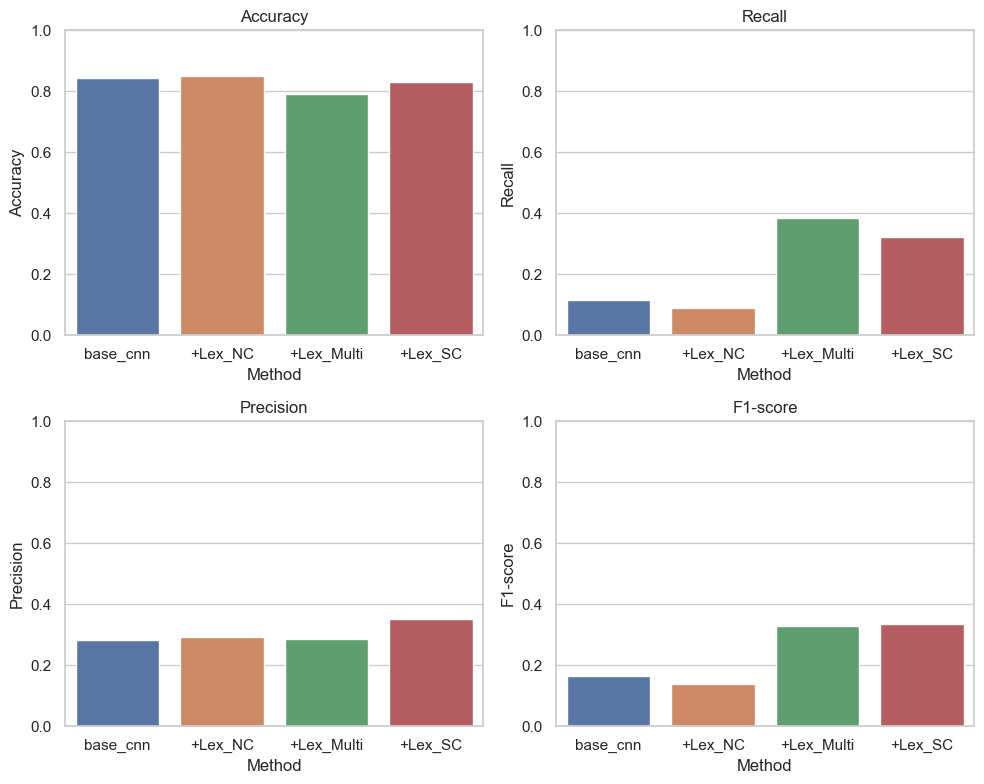

In [50]:
# method_name = ['base_line_CNN','Lex_NC_CNN','Lex_Multi_CNN','Lex_SC_CNN']
# method_value = [[acc_base,recall_base,preisi_base,f1_base],[acc_naive,recall_naive,preisi_naive,f1_naive],[acc_multi,recall_multi,preisi_multi,f1_multi],
#     [acc_seperated,recall_seperated,preisi_seperated,f1_seperated]]
method_name = ['Accuracy','Recall','Precision','F1-score','Method','num']
method_value = [[acc_base,acc_naive,acc_multi,acc_seperated],[recall_base,recall_naive,recall_multi,recall_seperated],[preisi_base,preisi_naive,preisi_multi,preisi_seperated],
    [f1_base,f1_naive,f1_multi,f1_seperated],['base_cnn','+Lex_NC','+Lex_Multi','+Lex_SC'],[1,2,3,4]]

method_result= dict(zip(method_name,method_value))
method_result= pd.DataFrame(method_result)

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot a histogram for each metric
sns.barplot(ax=axes[0, 0], data=method_result, y="Accuracy", x="Method")
sns.barplot(ax=axes[0, 1], data=method_result, y="Recall", x="Method")
sns.barplot(ax=axes[1, 0], data=method_result, y="Precision", x="Method")
sns.barplot(ax=axes[1, 1], data=method_result, y="F1-score", x="Method")

# Set the title for each plot
axes[0, 0].set_title("Accuracy")
axes[0, 0].set_ylim(0,1)
axes[0, 1].set_title("Recall")
axes[0, 1].set_ylim(0,1)
axes[1, 0].set_title("Precision")
axes[1, 0].set_ylim(0,1)
axes[1, 1].set_title("F1-score")
axes[1, 1].set_ylim(0,1)

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()
# # plot histogram for each metric
# for metric in method_result.columns:
#     plt.hist(method_result[metric], alpha=0.5, label=metric)

# plt.legend(loc='upper right')
# plt.show()

In [56]:
def make_plot_hist(m1,m2,m3,m4,train, validation, title):
    graph = plt.subplot(2,2,1)
    graph = plt.plot(m1.history[train],label='train')
    graph = plt.plot(m1.history[validation],label='val')
    graph = plt.subplot(2,2,2)
    graph = plt.plot(m2.history[train],label='train')
    graph = plt.plot(m2.history[validation],label='val')
    graph = plt.subplot(2,2,3)
    graph = plt.plot(m3.history[train],label='train')
    graph = plt.plot(m3.history[validation],label='val')
    graph = plt.subplot(2,2,4)
    graph = plt.plot(m4.history[train],label='train')
    graph = plt.plot(m4.history[validation],label='val')
    plt.legend()
    graph = plt.show()
    return graph

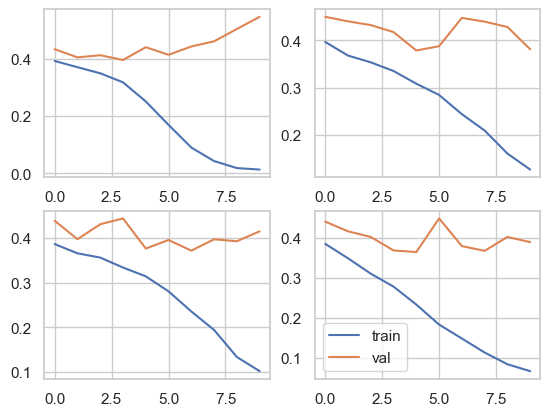

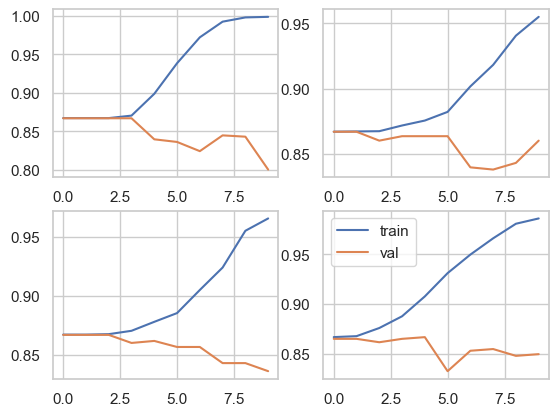

In [57]:
make_plot_hist(history_base,history_naive,history_multi,history_separated,'loss','val_loss','Perubahan loss pada tiap epochs')
make_plot_hist(history_base,history_naive,history_multi,history_separated,'accuracy','val_accuracy','Perubahan akurasi pada tiap epochs')

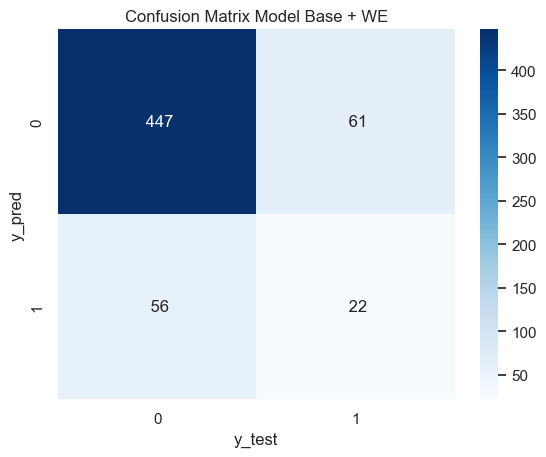

In [58]:
def out_cm(cm,title):
    ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
    ax.set_title(title)
    ax.set_xlabel('y_test')
    ax.set_ylabel('y_pred')

out_cm(cm1,'Confusion Matrix Model Base + WE')

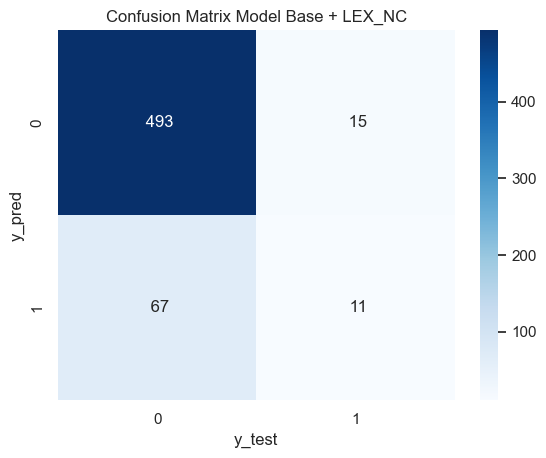

In [59]:
out_cm(cm2,'Confusion Matrix Model Base + LEX_NC')

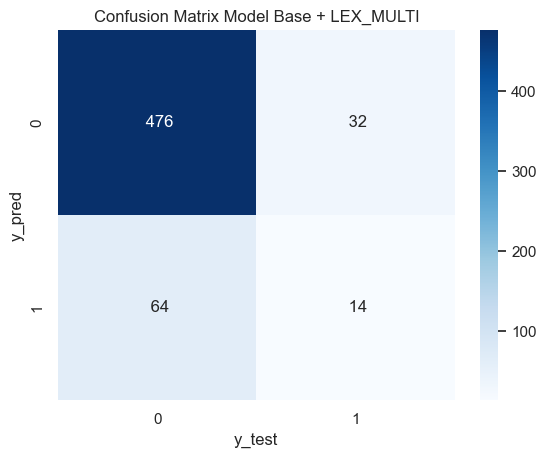

In [60]:
out_cm(cm3,'Confusion Matrix Model Base + LEX_MULTI')

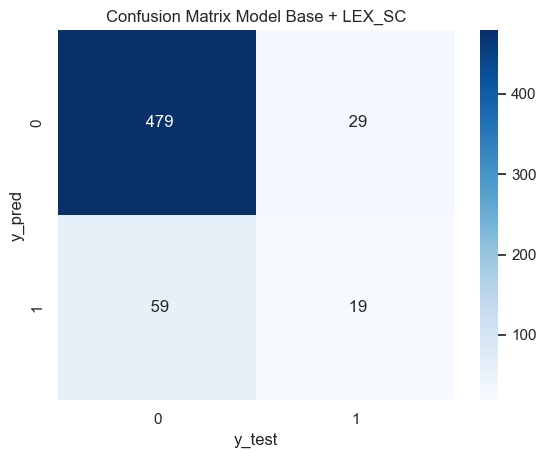

In [61]:
out_cm(cm4,'Confusion Matrix Model Base + LEX_SC')

In [141]:
print(classification_report(y_testnp,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        78
           1       0.80      0.71      0.75        78

    accuracy                           0.76       156
   macro avg       0.77      0.76      0.76       156
weighted avg       0.77      0.76      0.76       156

